In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import os
import cv2
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm 
import seaborn as sns
from PIL import Image
from numpy import asarray

np.set_printoptions(precision=5)#show 5 number after decimal point 

In [362]:
url = r"C:\\Users\\noa12\\OneDrive\\מסמכים\\GitHub\\Dogs_Vs_Cats_Project\\train\\"

In [363]:
def create_data():
    data,labels = list(), list()
    label = 0 #cat = 1 , dog = 0
    for img in tqdm(os.listdir(url)):
        if img.startswith('cat'): label = 1 
        else :label = 0 
        im = asarray(Image.open(url+img).resize((128,128)).convert('L'))
        data.append([im,label])
    np.save('data.npy', data)
    return data

In [364]:
data = create_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [02:07<00:00, 196.43it/s]


In [366]:
X = np.array([i[0] for i in data])
Y = np.array([i[1] for i in data])

In [367]:
#X = X /255.0

In [368]:
X.shape

(25000, 128, 128)

In [369]:
X = X.reshape((25000, 128*128))

In [390]:
from sklearn.model_selection import train_test_split

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

In [391]:
print("X_train.shape :" ,X_train.shape)
print("y_train.shape :", y_train.shape)
print ("X_test.shape :" , X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (22500, 16384)
y_train.shape : (22500,)
X_test.shape : (2500, 16384)
y_test.shape : (2500,)


In [392]:
class_names = {0:"cat", 1:"dog"}

In [393]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [412]:
pd.value_counts(y_train)

0    11298
1    11202
dtype: int64

In [395]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,accuracy_score(y_pred,y_test))

The DummyClassifier score is: 0.4808


#### RandomForestClassifier :

In [357]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.5024
CPU times: total: 3min 21s
Wall time: 3min 44s


In [414]:

kf= KFold(n_splits=10, random_state=42, shuffle=True)
RForest = RandomForestClassifier(random_state=42)
random_forest= cross_val_score(RForest, X_train,y_train, cv=kf, scoring='accuracy').mean()
print(random_forest)

0.6412444444444445


##### XGBClassifier:

In [105]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(objective="binary:logistic", random_state=42
                    ,n_estimators=150,gamma=0.5,subsample=0.6)
XGB.fit(X_train, y_train, eval_metric='auc')
y_pred = XGB.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.6728
CPU times: total: 29min 5s
Wall time: 4min 49s


In [417]:
%%time
from xgboost import XGBClassifier

kf= KFold(n_splits=3, random_state=42, shuffle=True)
XGBClassifier = XGBClassifier(objective="binary:logistic", random_state=42)
XGB = cross_val_score(XGBClassifier, X_train,y_train, cv=kf, scoring='accuracy').mean()
print(XGB)

[21:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.6549777777777778
CPU times: total: 2h 14min 29s
Wall time: 22min 56s

In [106]:
%%time
from sklearn.ensemble import AdaBoostClassifier

AdB = AdaBoostClassifier()
AdB.fit(X_train, y_train)
y_pred = AdB.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
print("Accuracy:", accuracy)
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.596
CPU times: total: 4min 15s
Wall time: 4min 16s


In [416]:
%%time
from sklearn.ensemble import AdaBoostClassifier

kf= KFold(n_splits=3, random_state=42, shuffle=True)
AdaBoost = AdaBoostClassifier()
AdB = cross_val_score(AdaBoost, X_train,y_train, cv=kf, scoring='accuracy').mean()
print(AdB)


0.5843999999999999
CPU times: total: 37min 58s
Wall time: 38min 49s


### GradientBoostingClassifier

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(verbose=1).fit(X_train, y_train)
y_pred = GBC.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#print("Classification Report: \n", metrics.classification_report(y_test, y_pred))    

      Iter       Train Loss   Remaining Time 
         1           1.3801           23.68m
         2           1.3741           23.50m
         3           1.3686           22.91m
         4           1.3641           22.54m
         5           1.3597           22.28m
         6           1.3556           22.22m
         7           1.3515           22.19m
         8           1.3471           22.09m
         9           1.3439           21.78m
        10           1.3403           21.55m
        20           1.3119           19.39m
        30           1.2873           17.11m
        40           1.2698           14.79m
        50           1.2539           12.37m
        60           1.2380            9.88m
        70           1.2242            7.41m
        80           1.2090            4.96m
        90           1.1966            2.47m
       100           1.1826            0.00s
Accuracy: 0.648


#### Hyperparameter Tuning: 

In [132]:
#Searching for better performance out of the models with RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#XGBClassifier

parameters = {
        'learning_rate': [ 0.1,0.3,0.03],
        'max_depth': [5,6,10],
        'min_child_weight': [1, 2],
        'subsample': [0.5,0.6,1],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [100,150,170,200]
         }

random_XGB = RandomizedSearchCV(XGBClassifier(),parameters, verbose=True, n_jobs=-1, 
                          cv=3,random_state=3, n_iter = 2, return_train_score=True, num_class=2)
random_XGB.fit(X_train,y_train, eval_metric='auc')
y_pred_XGB_random = random_XGB.predict(X_test)
print ("Accuracy Score = ",metrics.accuracy_score(y_test,y_pred_XGB_random))
print (random_XGB.best_params_)

In [17]:
import evalml
from evalml import AutoMLSearch
from evalml.objectives import LeadScoring

In [14]:
X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X,Y,problem_type='binary')

In [18]:
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='binary',max_batches=1,optimize_thresholds=True,max_batches=1)

In [19]:
automl.search()

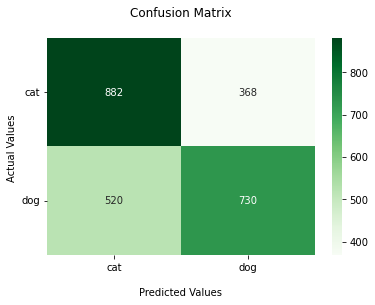

In [127]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(["cat","dog"])
ax.yaxis.set_ticklabels(["cat","dog"],rotation=0)

plt.show()